In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from scipy import spatial #There is no real reason to import scipy because all the interesting funcitons are in the submodules wich are not imported automaticly 

In [3]:
data=pd.read_csv('train2-2.txt', sep='|')

In [4]:
colnames = data.Cod_Prod.unique()
colnames.sort()
rownames = data.ID_Customer.unique()
rownames.sort()
idVSProd = pd.DataFrame(data=np.zeros((data.ID_Customer.unique().size,data.Cod_Prod.unique().size)),columns=colnames,index=rownames,dtype=int)

In [5]:
idVSProd.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
groupedData = data.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count() #Productos contratados por cliente
for product in colnames:
    columna = groupedData[:,product]
    idVSProd.loc[columna.index,product] = columna.values

In [11]:
idVSProd.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A0000003,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
def CosineDist_Prod(df, prod1, prod2):
    """
    Calcula la distancia entre dos productes basada en cosine distance.
    
    
    df: dataframe of userid vs prod (idVSProd), da que productos han sido contratados por que clientes
    prod1: producto uno
    prod2: producto dos
    """
    sim= 1 -spatial.distance.cosine(df[prod1], df[prod2])
    return sim



0.0738014711839


In [30]:
#Create similarity matrix.
SimilMatrix= pd.DataFrame(np.zeros((idVSProd.columns.size, idVSProd.columns.size)), columns=colnames, index=colnames)
SimilMatrix.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#FILL SIM MATRIX
for i in SimilMatrix.columns:
    for j in SimilMatrix.index:
        SimilMatrix.loc[i][j]=CosineDist_Prod(idVSProd,i,j)

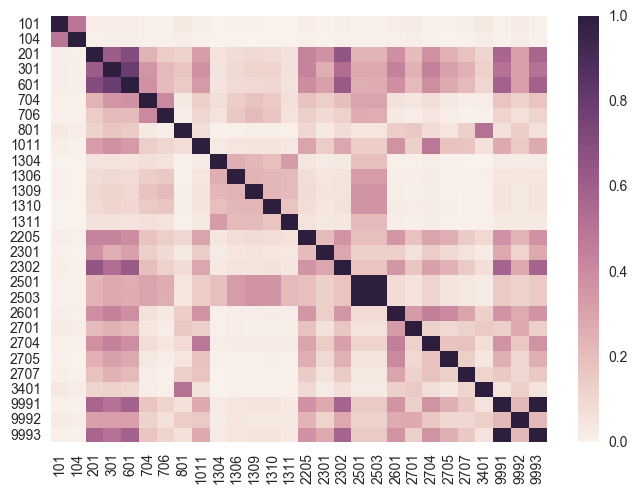

In [73]:
#Visualize with a HEAT MAP
#Seleccionamos solo los productos que tengan "alta" similitud con algun otro
 #treshhold de similitud
HighSimProd=SimilMatrix[SimilMatrix > 0.3].dropna(axis=1, thresh=2).columns #Drops all the products that do not have at least a sim coef > 0.3 with any other product
sns.heatmap(SimilMatrix.loc[HighSimProd][HighSimProd])

In [74]:
SimilMatrix.loc[HighSimProd][HighSimProd].shape

(28, 28)

In [79]:
SimilMatrix[SimilMatrix > 0.3].dropna(axis=1,thresh = 2).columns


Int64Index([ 101,  104,  201,  301,  601,  704,  706,  801, 1011, 1304, 1306,
            1309, 1310, 1311, 2205, 2301, 2302, 2501, 2503, 2601, 2701, 2704,
            2705, 2707, 3401, 9991, 9992, 9993],
           dtype='int64')